📚 **도서관 빅데이터를 활용한
20대 성별에 따른 대출 트랜드 분석** 📊

* 도서관 정보나루 데이터 사용

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

📝 **2022년 20대 성별별 대출량과 대출분야 분석**

In [2]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 파일 경로
file_path_man = '/content/drive/MyDrive/library_csv/2022년_20대_남성_인기도서.csv'
file_path_woman = '/content/drive/MyDrive/library_csv/2022년_20대_여성_인기도서.csv'


# 데이터프레임 변환(인코딩 에러 -> encoding 파라미터 활용)
df_man = pd.read_csv(file_path_man, encoding='cp949')
df_woman = pd.read_csv(file_path_woman, encoding='cp949')

#성별 열 추가
df_man['성별'] = '남성'
print('2022년_20대_남성_인기도서')
print(df_man.head())

df_woman['성별'] = '여성'
print('2022년_20대_여성_인기도서')
print(df_woman.head())


# 데이터프레임 합치기(행 방향으로 합치기)
df = pd.concat([df_man, df_woman])
print(df.info()) #400row 확인


#합친 데이터 프레임 가공
#권,ISBN 부가기호 열 삭제
df.drop(['권', 'ISBN부가기호'], axis=1, inplace=True)

#KDC 결측치 처리(396 non-null, 4건의 NaN)
df['KDC'].fillna(method='bfill', inplace=True)
print(df.info())



2022년_20대_남성_인기도서
   순위                                       서명                       저자  \
0   1  사피엔스 :유인원에서 사이보그까지, 인간 역사의 대담하고 위대한 질문     지은이: 유발 하라리 ;옮긴이: 조현욱   
1   2       공정하다는 착각 :능력주의는 모두에게 같은 기회를 제공하는가         마이클 샌델 지음 ;함규진 옮김   
2   3              나미야 잡화점의 기적 :히가시노 게이고 장편소설   지은이: 히가시노 게이고 ;옮긴이: 양윤옥   
3   4                     달러구트 꿈 백화점.이미예 장편소설                  지은이: 이미예   
4   5           돈의 속성 :최상위 부자가 말하는 돈에 대한 모든 것                  지은이: 김승호   

                출판사  출판년도   권          ISBN  ISBN부가기호     KDC  대출건수  성별  
0               김영사  2015 NaN  9.788930e+12    3900.0  909.00   973  남성  
1               미래엔  2020 NaN  9.791160e+12    3300.0  332.60   879  남성  
2              현대문학  2012 NaN  9.788970e+12    3830.0  833.60   842  남성  
3             팩토리나인  2020 NaN  9.791170e+12    3810.0  813.70   783  남성  
4  Snowfox(스노우폭스북스)  2020 NaN  9.791190e+12    3320.0  327.04   730  남성  
2022년_20대_여성_인기도서
   순위                           서명        저자                  출판사  출판

In [3]:
# KDC(한국십진분류법) 기반 분류를 위해 함수 매핑

def kdcFunc(x) :
  if (x > 0 and x <100):
    return '총류'
  elif (x >=100 and x<200) :
    return '철학'
  elif (x >=200 and x<300) :
    return '종교'
  elif (x >=300 and x<400) :
    return '사회과학'
  elif (x >=400 and x<500) :
    return '자연과학'
  elif (x >=500 and x<600) :
    return '기술과학'
  elif (x >=600 and x<700) :
    return '예술'
  elif (x >=700 and x<800) :
    return '언어'
  elif (x >=800 and x<900) :
    return '문학'
  elif (x >=900 and x<1000) :
    return '역사'
  else :
    return '미상'

df['sorted_KDC'] = df.apply(lambda x:kdcFunc(x['KDC']), axis=1)

print(df.info())
print(df['sorted_KDC'].value_counts())
print(df)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   순위          400 non-null    int64  
 1   서명          400 non-null    object 
 2   저자          400 non-null    object 
 3   출판사         400 non-null    object 
 4   출판년도        400 non-null    object 
 5   ISBN        400 non-null    float64
 6   KDC         400 non-null    float64
 7   대출건수        400 non-null    int64  
 8   성별          400 non-null    object 
 9   sorted_KDC  400 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 34.4+ KB
None
문학      220
사회과학    103
철학       37
총류       13
자연과학      9
기술과학      9
역사        6
예술        3
Name: sorted_KDC, dtype: int64
      순위                                       서명                       저자  \
0      1  사피엔스 :유인원에서 사이보그까지, 인간 역사의 대담하고 위대한 질문     지은이: 유발 하라리 ;옮긴이: 조현욱   
1      2       공정하다는 착각 :능력주의는 모두에게 같은 기회를 제공하는가    


📊 **성별에 따른 대출 데이터 시각화 (2022.01.01~2022.12.10)**


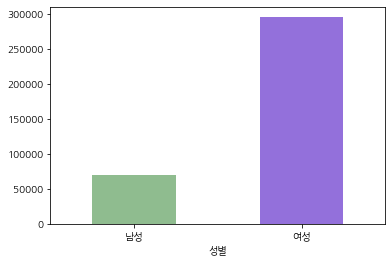

In [4]:
#성별별 대출건수 합산을 위한 groupby 연산
grouped_sex = df.groupby(df['성별'])['대출건수'].sum()

#성별별 대출건수 시각화
colors=['darkseagreen', 'mediumpurple']
grouped_sex.plot.bar(color=colors, rot=0)


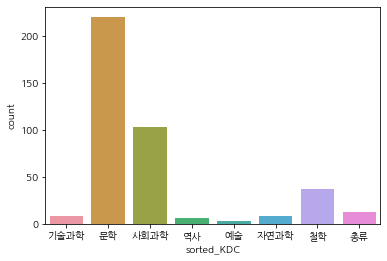

In [5]:
#대출 순위 200위 내 KDC 항목별 개수 그래프

sns.set_palette("hls")
df.sort_values(by=['sorted_KDC'], inplace=True) #가나다순 정렬
sns.countplot(data=df, x='sorted_KDC')

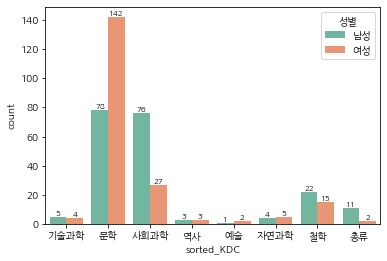

In [6]:
# 성별별 KDC 분류
sns.set_palette("Set2")
ax = sns.countplot(data=df, x='sorted_KDC', hue='성별')

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, 
            height + 1, height, ha = 'center', size = 8)
plt.show()

sorted_KDC
문학      255819
사회과학     55997
철학       26224
자연과학      9199
기술과학      6616
총류        5450
역사        5304
예술        2305
Name: 대출건수, dtype: int64


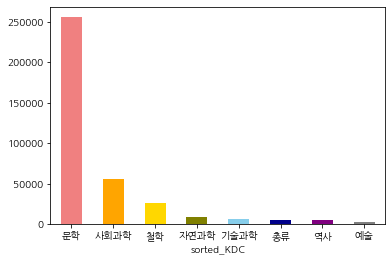

In [7]:
# 20대 전체 기준 KDC별 대출건수 시각화 (bar chart)

sumKDC = df.groupby(df['sorted_KDC'])['대출건수'].sum().sort_values(ascending=False)
print(sumKDC)
colors=['lightcoral', 'orange', 'gold', 'olive', 'skyblue', 'darkblue', 'purple', 'grey']
sumKDC.plot.bar(color=colors, rot=0)


sorted_KDC
문학      255819
사회과학     55997
철학       26224
자연과학      9199
기술과학      6616
Name: 대출건수, dtype: int64


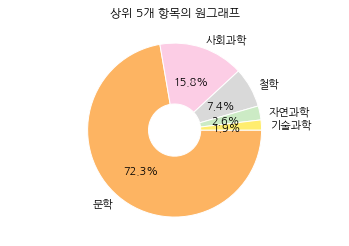

In [8]:
# 20대 전체 기준 KDC별 대출건수 시각화(상위 5개 항목의 pie chart)

sumKDC2 = sumKDC.head() #상위 5개 행 추출
print(sumKDC2)

plt.axis('equal')
plt.title('상위 5개 항목의 원그래프')
color_list = plt.cm.Set3(np.linspace(0.45, 1, 5))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

# autopct 숫자 소수점 한자리 표현 #shadow=True
plt.pie(sumKDC2, labels=sumKDC2.index, colors=color_list, autopct='%.1f%%', counterclock=False, 
        wedgeprops=wedgeprops, textprops={'fontsize': 11}) 
plt.show()



    성별 sorted_KDC    대출건수
0   남성       기술과학    1812
1   남성         문학   26648
2   남성       사회과학   27002
3   남성         역사    1566
4   남성         예술     267
5   남성       자연과학    1678
6   남성         철학    8432
7   남성         총류    3580
8   여성       기술과학    4804
9   여성         문학  229171
10  여성       사회과학   28995
11  여성         역사    3738
12  여성         예술    2038
13  여성       자연과학    7521
14  여성         철학   17792
15  여성         총류    1870


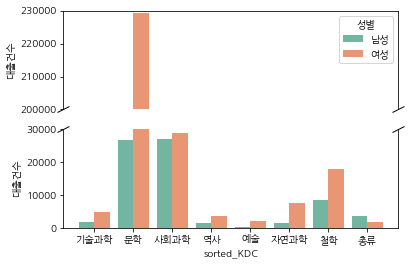

In [11]:
# 20대 전체 기준 KDC별 대출건수 시각화 (bar chart) 

sumKDC = df.groupby(['성별','sorted_KDC'])['대출건수'].sum()
sumKDC = sumKDC.to_frame().reset_index()
print(sumKDC)

colors=['lightcoral', 'orange', 'gold', 'olive', 'skyblue', 'darkblue', 'purple', 'grey']

ax1 = plt.subplot(2, 1, 1)  
ax1 = sns.barplot(data=sumKDC, x='sorted_KDC', y='대출건수', hue='성별')
plt.xticks(visible=False)

ax2 = plt.subplot(2, 1, 2, sharex=ax1)  
ax2 = sns.barplot(data=sumKDC, x='sorted_KDC', y='대출건수', hue='성별')

ax1.set_ylim(200000, 230000)
ax2.set_ylim(0, 30000)

# 그래프 사이의 경계선 제거
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

ax2.get_legend().remove()
ax1.axes.xaxis.set_visible(False)

# y축에 물결선 표시
kwargs = dict(marker=[(-1, -0.5), (1, 0.5)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.show()

In [14]:
df12 = df[df['sorted_KDC']=='총류']
print(df12)

      순위                                                 서명  \
182  183        파이썬 알고리즘 인터뷰 :95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트    
188  189                                 지적 대화를 위한 넓고 얕은 지식   
193  192                                 지적 대화를 위한 넓고 얕은 지식   
27    28  이것이 취업을 위한 코딩 테스트다 with 파이썬 :취업과 이직을 결정하는 알고리즘...   
135  132  (한 권으로 읽는) 컴퓨터 구조와 프로그래밍 :더 나은 소프트웨어 개발을 위한 하드...   
112  113                         (비전공자를 위한 이해할 수 있는) IT 지식    
118  118               혼자 공부하는 파이썬 :1:1 과외하듯 배우는 프로그래밍 자습서    
29    30                         (비전공자를 위한 이해할 수 있는) IT 지식    
171  172  지적 대화를 위한 넓고 얕은 지식 1 - 현실 편 : 역사 / 경제 / 정치 / 사...   
98    99  1일 1로그 100일 완성 IT 지식 :하드웨어, 소트프웨어, 통신, 데이터, 4가...   
92    93       지적 대화를 위한 넓고 얕은 지식 :한 권으로 현실을 통찰하게 하는 지식 여행서   
56    57  지적 대화를 위한 넓고 얕은 지식 1 - 현실 편 : 역사 / 경제 / 정치 / 사...   
78    78   지적 대화를 위한 넓고 얕은 지식 0 :지혜를 찾아 138억 년을 달리는 시간 여행서    

                         저자               출판사  출판년도          ISBN    KDC  \
182        박상길 지음 ;정진호 일러스트              

📝 **2021년 20대 성별, 분기별 대출량과 대출분야 분석**

In [15]:
# 데이터 전처리

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns


# csv 불러오기
file_path_man1 = '/content/drive/MyDrive/library_csv/2021_1분기_남성.csv'
file_path_man2 = '/content/drive/MyDrive/library_csv/2021_2분기_남성.csv'
file_path_man3 = '/content/drive/MyDrive/library_csv/2021_3분기_남성.csv'
file_path_man4 = '/content/drive/MyDrive/library_csv/2021_4분기_남성.csv'

file_path_woman1 = '/content/drive/MyDrive/library_csv/2021_1분기_여성.csv'
file_path_woman2 = '/content/drive/MyDrive/library_csv/2021_2분기_여성.csv'
file_path_woman3 = '/content/drive/MyDrive/library_csv/2021_3분기_여성.csv'
file_path_woman4 = '/content/drive/MyDrive/library_csv/2021_4분기_여성.csv'


# 데이터프레임 변환
df_man1 = pd.read_csv(file_path_man1, encoding='cp949')
df_man2 = pd.read_csv(file_path_man2, encoding='cp949')
df_man3 = pd.read_csv(file_path_man3, encoding='cp949')
df_man4 = pd.read_csv(file_path_man4, encoding='cp949')

df_woman1 = pd.read_csv(file_path_woman1, encoding='cp949')
df_woman2 = pd.read_csv(file_path_woman2, encoding='cp949')
df_woman3 = pd.read_csv(file_path_woman3, encoding='cp949')
df_woman4 = pd.read_csv(file_path_woman4, encoding='cp949')


# 성별, 분기 열 추가
man_list = [df_man1, df_man2, df_man3, df_man4]
woman_list = [df_woman1, df_woman2, df_woman3, df_woman4]
num_list = [1, 2, 3, 4]

for i, j in zip(man_list, num_list):
  i['성별'] = '남성'
  i['분기'] = str(j)+ '분기'

for i, j in zip(woman_list, num_list) :
  i['성별'] = '여성'
  i['분기'] = str(j)+ '분기'
  
# print(df_man3.info())
# print(df_woman3.head())


# 데이터프레임 합치기(행 방향)
df_quater = pd.concat([df_man1, df_man2, df_man3, df_man4, df_woman1, df_woman2, df_woman3, df_woman4])
print(df_quater.info()) #1600행 확인(200*8)


# 데이터프레임 불필요한 행 삭제
df_quater.drop(['권', 'ISBN', 'ISBN부가기호'], axis=1, inplace=True)


# KDC 결측치 처리 (1597 non-null, 3건)
df_quater['KDC'].fillna(method='bfill', inplace=True)


# KDC 처리
df_quater['sorted_KDC'] = df_quater.apply(lambda x:kdcFunc(x['KDC']), axis=1)

print(df_quater.info())
print(df_quater['sorted_KDC'].value_counts())
print(df_quater)

df_quater.to_csv('분기별.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   순위        1600 non-null   int64  
 1   서명        1600 non-null   object 
 2   저자        1600 non-null   object 
 3   출판사       1600 non-null   object 
 4   출판년도      1600 non-null   object 
 5   권         163 non-null    float64
 6   ISBN      1600 non-null   float64
 7   ISBN부가기호  1584 non-null   float64
 8   KDC       1597 non-null   float64
 9   대출건수      1600 non-null   int64  
 10  성별        1600 non-null   object 
 11  분기        1600 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 162.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   순위          1600 non-null   int64  
 1   서명          1600 non-null   object 
 2   저자  

분기
1분기    77371
2분기    65949
3분기    78994
4분기    70568
Name: 대출건수, dtype: int64


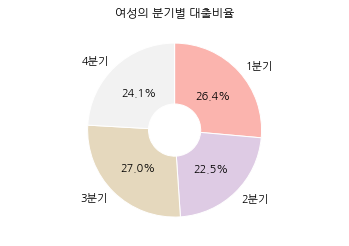

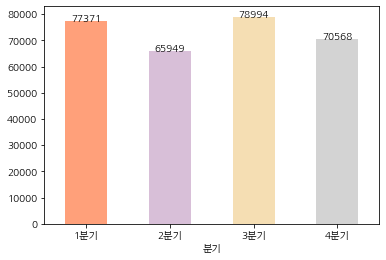

In [73]:
# 성별에 따른 분기별 대출량 구하기

# 여성
quater_woman =  df_quater[df_quater['성별']=='여성']
grouped_woman = quater_woman.groupby(['분기'])['대출건수'].sum()
print(grouped_woman)

# pie chart
plt.axis('equal')
plt.title('여성의 분기별 대출비율')
color_list = plt.cm.Pastel1((np.linspace(0, 1, 4)))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

# autopct 숫자 소수점 한자리 표현
plt.pie(grouped_woman, labels=grouped_woman.index, colors=color_list, autopct='%.1f%%', 
        counterclock=False, wedgeprops=wedgeprops, textprops={'fontsize': 11}, startangle=90)
plt.show()

# bar chart
colors=['lightsalmon', 'thistle', 'wheat', 'lightgrey']
ax = grouped_woman.plot.bar(color=colors, rot=0)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, height, ha = 'center', size = 10)


분기
1분기    20124
2분기    19200
3분기    21538
4분기    20121
Name: 대출건수, dtype: int64


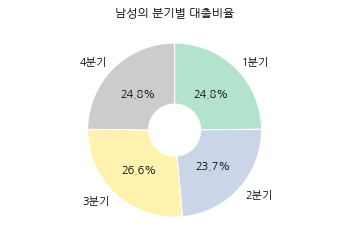

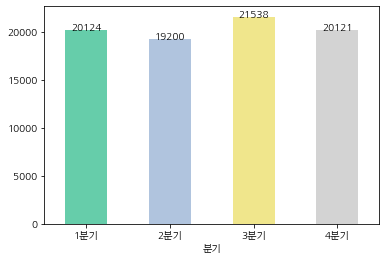

In [51]:
#남성
quater_man = df_quater[df_quater['성별']=='남성']
grouped_man = quater_man.groupby(['분기'])['대출건수'].sum()
print(grouped_man)

plt.axis('equal')
plt.title('남성의 분기별 대출비율')
color_list = plt.cm.Pastel2((np.linspace(0, 1, 4)))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}


# autopct 숫자 소수점 한자리 표현
plt.pie(grouped_man, labels=grouped_man.index, colors=color_list, autopct='%.1f%%', counterclock=False,wedgeprops=wedgeprops, textprops={'fontsize': 11}, startangle=90) #shadow=True
plt.show()

colors=['mediumaquamarine', 'lightsteelblue', 'khaki', 'lightgrey']

ax = grouped_man.plot.bar(color=colors, rot=0)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, height, ha = 'center', size = 10)


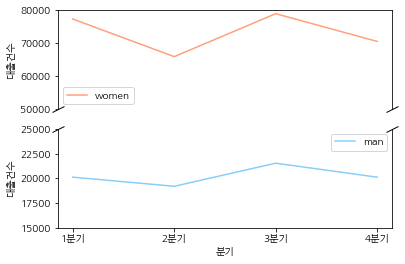

In [71]:
#남녀 라인플롯 합치기
ax1 = plt.subplot(2, 1, 1)  
ax1 = sns.lineplot(data=grouped_woman, label='women', color='lightsalmon')
plt.xticks(visible=False)

ax2 = plt.subplot(2, 1, 2, sharex=ax1)  
ax2 =sns.lineplot(data=grouped_man, label='man', color='lightskyblue')

ax1.set_ylim(50000, 80000)
ax2.set_ylim(15000, 25000)

# 그래프 사이의 경계선 제거
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# ax2.get_legend().remove()
ax1.axes.xaxis.set_visible(False)

# y축에 물결선 표시
kwargs = dict(marker=[(-1, -0.5), (1, 0.5)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.show()

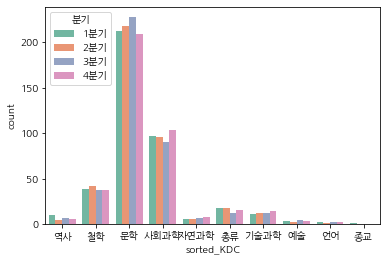

In [77]:
# 분기별 대출도서 유형 분류
sns.set_palette("Set2")
sns.countplot(data=df_quater, x='sorted_KDC', hue='분기')